In [4]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
%matplotlib inline

mnist = input_data.read_data_sets("/Users/cdts/Developer/Projects/AI/TensorFlow/MNIST_data/", one_hot=True)

Extracting /Users/cdts/Developer/Projects/AI/TensorFlow/MNIST_data/train-images-idx3-ubyte.gz
Extracting /Users/cdts/Developer/Projects/AI/TensorFlow/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /Users/cdts/Developer/Projects/AI/TensorFlow/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/cdts/Developer/Projects/AI/TensorFlow/MNIST_data/t10k-labels-idx1-ubyte.gz


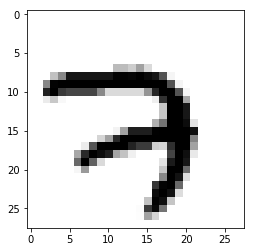

In [5]:
tmp = mnist.train.images[0]
tmp = tmp.reshape((28,28))

plt.imshow(tmp, cmap = cm.Greys)
plt.show()

In [8]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.91530001

In [9]:
# A red/black/blue colormap
cdict = {'red':   [(0.0,  1.0, 1.0),
                    (0.25,  1.0, 1.0),
                    (0.5,  0.0, 0.0),
                    (1.0,  0.0, 0.0)],
        'green': [(0.0,  0.0, 0.0),
                    (1.0,  0.0, 0.0)],
        'blue':  [(0.0,  0.0, 0.0),
                       (0.5,  0.0, 0.0),
                       (0.75, 1.0, 1.0),
                       (1.0,  1.0, 1.0)]}
redblue = matplotlib.colors.LinearSegmentedColormap('red_black_blue',cdict,256)

Digit 0


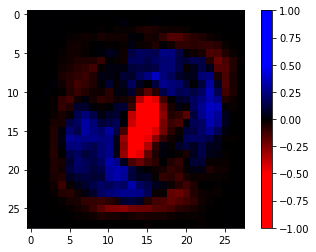

Digit 1


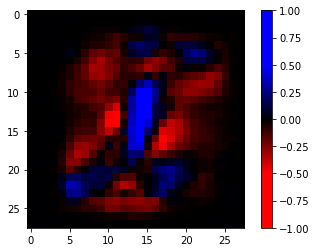

Digit 2


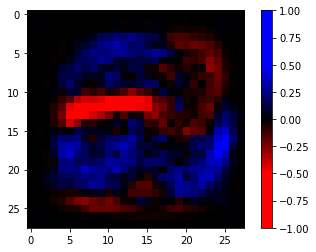

Digit 3


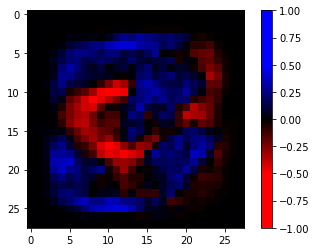

Digit 4


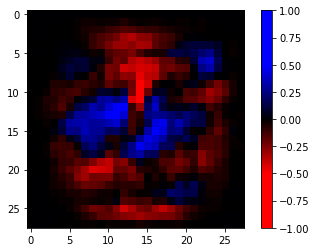

Digit 5


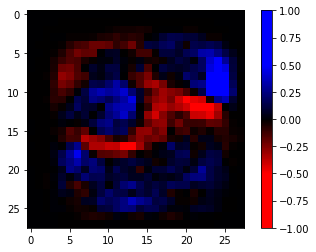

Digit 6


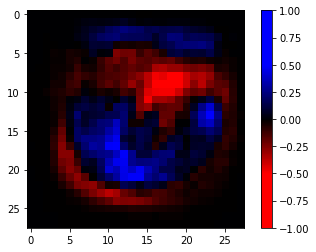

Digit 7


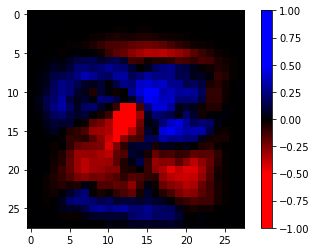

Digit 8


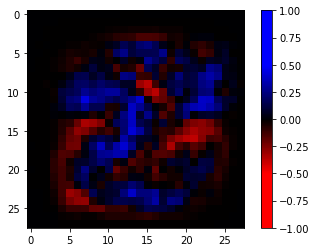

Digit 9


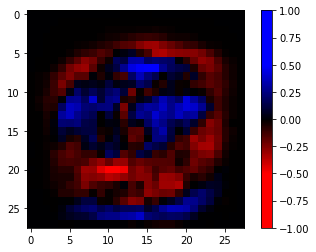

In [10]:
wts = W.eval(sess)
for i in range(0,10):
    im = wts.flatten()[i::10].reshape((28,-1))
    plt.imshow(im, cmap = redblue, clim=(-1.0, 1.0))
    plt.colorbar()
    print "Digit %d" % i
    plt.show()